##### ZJ_Zhang_Project1.py

#### group members: Gege Li, Zhijing Zhang
##### come up with problems: both
##### 1st solution :Zhijing Zhang
##### 2nd solution: both
##### 3rd solution: both
##### comments: Completed separately

##### A question after 1st 

### Assuming that this data exploratory is performed to customers who would take planes from Houston, they would like to know about the these three questions:
questions start from when the passengers choose the airports, then choose the flights and see the flights table in the airport. We will use some pandas to add, remove and transform data within this data frame. And use some basic statistics and graphics to show our exploratory answers and analytics to the questions passengers care about.
1. Which airpot has a higher rate of delay in IAH and HOU? If i were a customer, i'd like to choose the one with lower rate of delay.
2. Which flight is the fastest from Houston to my destination? After choosing a better airport, i want to know that the fastest flight in all flights flying to my destination.
3. Show a flights table. When i get to airport, there should be a screen to show the flights information. Show the flights table and find the flight i would take.


In [1]:
# Remember: in all of the functions, NEVER NEVER NEVER using the inplace Parameters
# inplace default False, if inplace = Ture, the origin will be replaced.

import pandas as pd
from pandas import Series, DataFrame

filename = pd.DataFrame([])
filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
flights = pd.read_csv(filename)

### For 1st question:
rate of departure delay = number of dep delay / number of all flights

rate of arrival delay = number of arrival delay / number of all flights

Comparing the rate of IAH and HOU, choose a better one having lower rate of delay.

The caculating steps are:
- Find the delay flights of IAH and HOU. For the US Bureau of Transportation Statistics:
  -  arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time. 
  - departure Delay equals the difference between the scheduled departure time and the actual departure time from the origin airport gate. A flight is considered out-time when it is later than the published departure time.
- I choose the columns, 'ArrDelay', 'DepDelay', and 'Origin' to calculate the results, and create the new columns 'IfArrDelay', 'Reparation', and 'IfDepDelay' using the loc().
 - The initial value of  'IfArrDelay' and 'IfDepDelay' are '0', means no delay. And the  'Reparation' is 'N', means no reparation.
 - If the 'ArrDelay'>15, set the 'IfArrDelay' to '1', means having arrival delay.
 - If the 'DepDelay'>0, set the 'IfDepDelay' to '1', means having departure delay.
 - If the 'ArrDelay'>120, set the 'Reparation' to 'Y', means having reparation for 2 hours' delay.
- Use the len() or count() of Pandas to count the number of each one above.


In [2]:
# initial of IfArrDelay and IfDepDelay are 0,means no delay.
flights['IfArrDelay'] = '0'
flights['IfDepDelay'] = '0'
flights['Reparation'] = 'N'

# if ArrDelay > 15, set the value of IfArrDelay = 1.
flights.loc[flights['ArrDelay'] > 15, 'IfArrDelay'] = '1'
flights.loc[flights['ArrDelay'] > 120, 'Reparation'] = 'Y'
flights.loc[flights['DepDelay'] > 0, 'IfDepDelay'] = '1'

# quantity of delay from IAH
a = len(flights[(flights['Origin']=='IAH')&(flights['IfArrDelay']=='1')])
# quantity of all flights
b = len(flights[flights['Origin']=='IAH'])
print("IAH_rate_of_ArrDelay:", a / b)
c = len(flights[(flights['Origin']=='HOU')&(flights['IfArrDelay']=='1')])
d = len(flights[flights['Origin']=='HOU'])
print("HOU_rate_of_ArrDelay:", c / d)
if(a/b > c/d):
    print("IAH has more arrival delay")
else:
    print("HOU has more arrival delay")

# quantity of delay to IAH    
e = len(flights[(flights['Origin']=='IAH')&(flights['IfDepDelay']=='1')])
f = len(flights[flights['Origin']=='IAH'])
print("IAH_rate_of_DepDelay:", e / f)
g = len(flights[(flights['Origin']=='HOU')&(flights['IfDepDelay']=='1')])
h = len(flights[flights['Origin']=='HOU'])
print("HOU_rate_of_DepDelay:", g / h)
if(e/f > g/h):
    print("IAH has more departure delay")
else:
    print("HOU has more departure delay")
    

IAH_rate_of_ArrDelay: 0.1730756967030164
HOU_rate_of_ArrDelay: 0.24172262097707803
HOU has more arrival delay
IAH_rate_of_DepDelay: 0.46030227664052037
HOU_rate_of_DepDelay: 0.6515397082658023
HOU has more departure delay


##### Answer for 1st question:
The Hou has a higher delay both in arrival and departure.

If i were a customer, i prefer the IAH.

But the premise is that there are flights from here. 

##### The visualization graphics i choosing is box plots and density

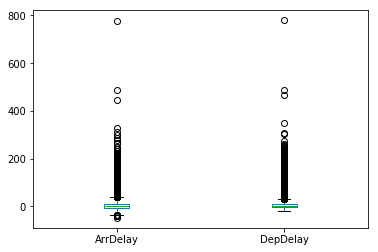

In [60]:
flights[['ArrDelay','DepDelay']].plot(kind = 'box')

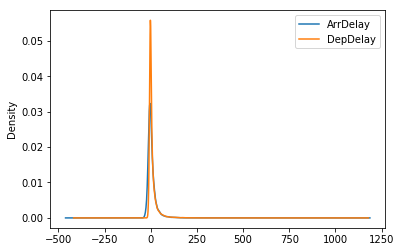

In [7]:
# a denstiy to show the most delaytime
flights[['ArrDelay','DepDelay']].plot(kind = 'density')

##### The summary statistics for these variable indicate that the sum of both IAH and HOU ' rate of departure delay are almost 1, it is very high. These two airports should put more time to optimization, and check the weather with higher frequency to chech the reason of delay. Maybe thay should cut some flights to ensure the on-time flights.

### Question:
In fact, i want to make the box plots chart to show the IAH and HOU delay rate, and compare these two airports.

But i can't use any conditions with plot(). such as:

flight[(flights['Origin']=='IAH')&(flights['IfDepDelay']==1)].plot(kind = 'box')

How to do this?

### For the 2nd question:
The fastest flight means the attribute 'ActualElapsedTime' has a min number.

For different 'flightnum', there is a different min 'ActualElapsedTime'.

So i use the Groupby().min() in Pandas for 'Origin', 'Dest' and 'ActualElapsedTime' to find the min 'ActualElapsedTime'. 

And loc() can show the dataframe i want.

And using the describe() can calculate the mean, min, max of the value.



 print the fastest fligntnum and time of every flight.

In [57]:
# print the fastest fligntnum and time of every flight.

print("Here is what i want:\n",flights.groupby(['Origin','Dest']).min().loc[:,['FlightNum','Distance','ActualElapsedTime']])

Here is what i want:
              FlightNum  Distance  ActualElapsedTime
Origin Dest                                        
HOU    ABQ         726       759              117.0
       ATL         286       696               94.0
       AUS          38       148               36.0
       BHM           5       570               76.0
       BNA          23       670               87.0
       BWI          45      1246              141.0
       CRP           1       187               41.0
       DAL           2       239               44.0
       DEN         102       883              130.0
       DFW        2870       247               56.0
       ECP          15       570               73.0
       ELP          37       677              103.0
       FLL           7       957              118.0
       HRL           1       276               49.0
       JAN          19       359               55.0
       JAX        1008       816              104.0
       JFK         620      1428          

If i'm from HOU to JFK, print the fastest flight.

In [14]:
# If i'm from HOU to JFK, print the fastest flight.
# method 1

f = flights[(flights['Origin'] == 'HOU') & (flights['Dest'] == 'JFK')]
f = f.groupby('FlightNum').min().loc[:,'ActualElapsedTime']
print(f)

FlightNum
620    165.0
622    179.0
624    168.0
Name: ActualElapsedTime, dtype: float64


In [15]:
# method 2

f = flights[(flights['Origin'] == 'HOU') & (flights['Dest'] == 'JFK')]
print(f['ActualElapsedTime'].describe()['min'])


165.0


##### The visualization graphics i choosing is line plots and box plots

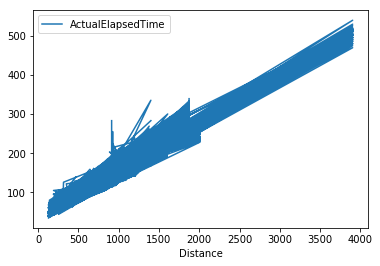

In [59]:
# line plot of From IAH's ActualElapsedTime by Distance

fplot = flights[flights['Origin'] == 'IAH'].plot(x = 'Distance', y = 'ActualElapsedTime')
fplot

##### the summary statistics for the these variable indicate that ActualElapsedTime is more and more with the Distance longer and longer. It has no meaning to show, just try creating of line plots.

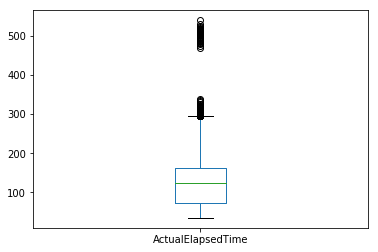

In [4]:
flights['ActualElapsedTime'].plot(kind = 'box')

##### the summary statistics for the ActualElapsedTime variable indicate that huge part of flights from Houston are below 200 minutes, And the most is anout 100 minutes. Above 300 is few. Maybe few people in Houston would take planes more than 1 day.

### For the 3rd question:
For a customer, the useful information in flights table is about date, flightsnum, origin, destination, if departure delay, and the if canceling.

I choose the columns about these information and use the drop() to drop the columns i don't need.

And rename() the columns to prevent confusing.

In this test, i also try the other functions like delete() to deal with the data.


In [29]:
print(flights.head(1))

   Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0  2011      1           1          6   1400.0   1500.0            AA   

   FlightNum TailNum  ActualElapsedTime   ...     ArrDelay  DepDelay  Origin  \
0        428  N576AA               60.0   ...        -10.0       0.0     IAH   

  Dest Distance  TaxiIn  TaxiOut  Cancelled  CancellationCode Diverted  
0  DFW      224     7.0     13.0          0               NaN        0  

[1 rows x 21 columns]


In [51]:
# Print the flight table just to show the information i need
# example of 1-31-2011
# method 1: drop

# rename the columns to prevent confusing.
flights = flights.rename({'Month':'M', 'DayofMonth': 'DoM', 'DayofWeek': 'DoW', 'CancellationCode': 'CoC'}, axis=1)

# Here i want to replace the '-' using the 'early', but it didn't work.
#flights.DepDelay.replace('-%', 'early')

flights = flights.drop(flights.columns[[0, 3, 6, 8, 9, 10,-6, -5, -4, -2, -1]], axis=1) 
f = flights[(flights['M'] == 1) & (flights['DoM'] == 31)]
print(f.head(10))

     M  DoM  DepTime  ArrTime  FlightNum  ArrDelay  DepDelay Origin Dest  \
30   1   31   1441.0   1553.0        428      43.0      41.0    IAH  DFW   
61   1   31    718.0    816.0        460     -19.0      -2.0    IAH  DFW   
87   1   31   1954.0   2105.0        533     -15.0     -11.0    IAH  DFW   
118  1   31   1656.0   1758.0       1121      13.0      26.0    IAH  DFW   
149  1   31   1757.0   2101.0       1294     -14.0       2.0    IAH  MIA   
170  1   31    941.0   1054.0       1436      29.0      31.0    IAH  DFW   
201  1   31   1013.0   1336.0       1700      -4.0      -7.0    IAH  MIA   
232  1   31   1205.0   1317.0       1820       7.0       0.0    IAH  DFW   
272  1   31    556.0    857.0       1994     -18.0      -4.0    IAH  MIA   
303  1   31   1827.0   2111.0        731       1.0       2.0    IAH  SEA   

     Cancelled  
30           0  
61           0  
87           0  
118          0  
149          0  
170          0  
201          0  
232          0  
272       

##### After drop(), the The original data has not replaced.

In [53]:
print(flights.head())

   Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0  2011      1           1          6   1400.0   1500.0            AA   
1  2011      1           2          7   1401.0   1501.0            AA   
2  2011      1           3          1   1352.0   1502.0            AA   
3  2011      1           4          2   1403.0   1513.0            AA   
4  2011      1           5          3   1405.0   1507.0            AA   

   FlightNum TailNum  ActualElapsedTime   ...     ArrDelay  DepDelay  Origin  \
0        428  N576AA               60.0   ...        -10.0       0.0     IAH   
1        428  N557AA               60.0   ...         -9.0       1.0     IAH   
2        428  N541AA               70.0   ...         -8.0      -8.0     IAH   
3        428  N403AA               70.0   ...          3.0       3.0     IAH   
4        428  N492AA               62.0   ...         -3.0       5.0     IAH   

  Dest Distance  TaxiIn  TaxiOut  Cancelled  CancellationCode Diverted  
0  DFW 

In [48]:
# method 2 

flights = flights.iloc[:,[1,2,4,5,7,11,12,13,14,-3]]
f = flights[(flights['Month'] == 1) & (flights['DayofMonth'] == 31)]
print(f.head(3))

    Month  DayofMonth  DepTime  ArrTime  FlightNum  ArrDelay  DepDelay Origin  \
30      1          31   1441.0   1553.0        428      43.0      41.0    IAH   
61      1          31    718.0    816.0        460     -19.0      -2.0    IAH   
87      1          31   1954.0   2105.0        533     -15.0     -11.0    IAH   

   Dest  Cancelled  
30  DFW          0  
61  DFW          0  
87  DFW          0  


##### The visualization graphics i choosing is text table

In [55]:
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
flights = pd.read_csv(filename)
flights = flights.iloc[:,[1,2,4,5,7,11,12,13,14,-3]]
flights.head(10)

,Month,DayofMonth,DepTime,ArrTime,FlightNum,ArrDelay,DepDelay,Origin,Dest,Cancelled
0,1,1,1400.0,1500.0,428,-10.0,0.0,IAH,DFW,0
1,1,2,1401.0,1501.0,428,-9.0,1.0,IAH,DFW,0
2,1,3,1352.0,1502.0,428,-8.0,-8.0,IAH,DFW,0
3,1,4,1403.0,1513.0,428,3.0,3.0,IAH,DFW,0
4,1,5,1405.0,1507.0,428,-3.0,5.0,IAH,DFW,0
5,1,6,1359.0,1503.0,428,-7.0,-1.0,IAH,DFW,0
6,1,7,1359.0,1509.0,428,-1.0,-1.0,IAH,DFW,0
7,1,8,1355.0,1454.0,428,-16.0,-5.0,IAH,DFW,0
8,1,9,1443.0,1554.0,428,44.0,43.0,IAH,DFW,0
9,1,10,1443.0,1553.0,428,43.0,43.0,IAH,DFW,0


##### This text table is like the flights table in the airports. Customers can get the information about their flights from it. It is clear and useful.